In [1]:
# importing libraries
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

In [2]:
t1 = time.time()
# Dataset-Unicauca-Version2-87Atts.csv has 3577296 rows in reality, but we are only loading/previewing the first 3 000 000 rows
nRowsRead = 3000000 #number of rows to read
# change the path to where the file Dataset-Unicauca-Version2-87Atts.csv is in the local
dataset = pd.read_csv(r'C:\Users\Pc\Downloads\ENSEEIHT_etudes\Annee_3\Projet_long\classification_machine_learning\datas\Dataset-Unicauca-Version2-87Atts.csv', delimiter=',', nrows = nRowsRead)
dataset

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,192.168.40.31-10.200.7.8-49809-3128-6,192.168.40.31,49809,10.200.7.8,3128,6,11/05/201703:39:14,46041026,10,10,...,0.000000,533057.0,533057.0,45507721.0,0.000000e+00,45507721.0,45507721.0,BENIGN,122,GMAIL
2999996,192.168.40.31-10.200.7.8-49782-3128-6,192.168.40.31,49782,10.200.7.8,3128,6,11/05/201703:38:38,75778246,13,16,...,96526.439593,136796.0,287.0,37820474.5,1.024072e+07,45061756.0,30579193.0,BENIGN,126,GOOGLE
2999997,192.168.40.31-10.200.7.7-49667-3128-6,192.168.40.31,49667,10.200.7.7,3128,6,11/05/201703:32:59,2,2,0,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN,126,GOOGLE
2999998,192.168.40.31-10.200.7.8-49790-3128-6,192.168.40.31,49790,10.200.7.8,3128,6,11/05/201703:40:24,772473,9,7,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN,126,GOOGLE


In [3]:
dataset.shape

(3000000, 87)

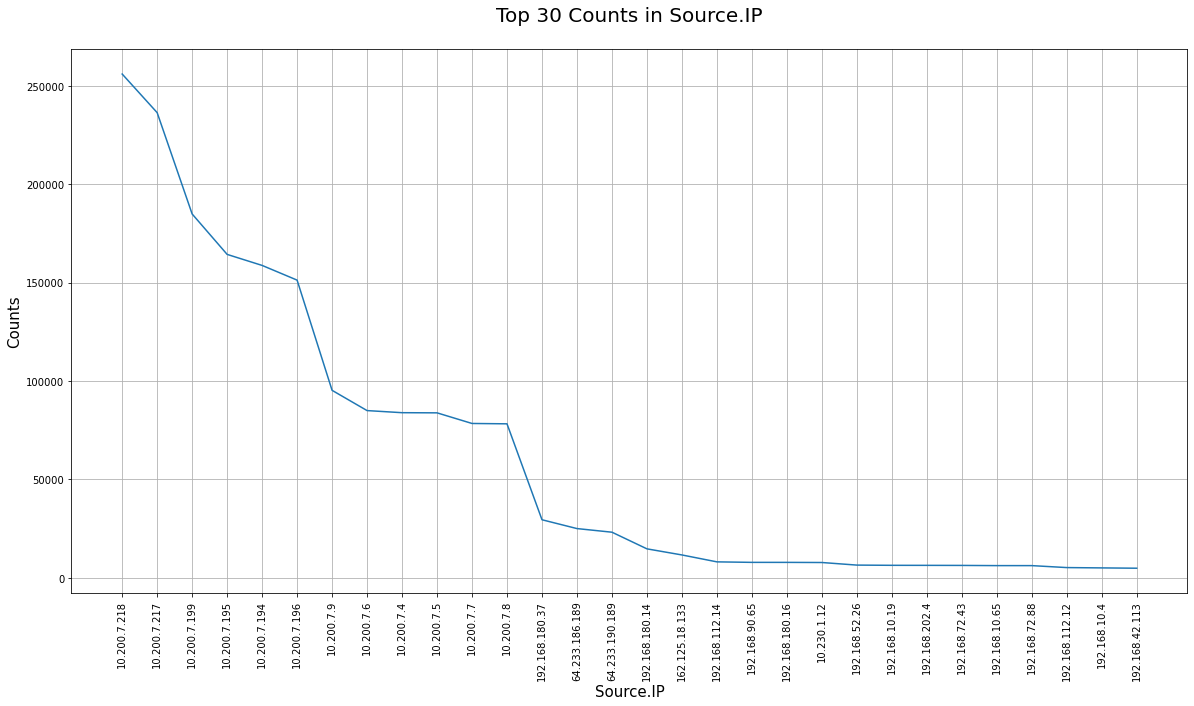

In [4]:
# Histogram on Source.IP

Sour_feat = pd.DataFrame(dataset['Source.IP'].value_counts()[:30])
plt.figure(figsize=(20,10))
plt.plot(Sour_feat)
plt.xticks(rotation=90)
plt.xlabel('Source.IP', {'fontsize':15})
plt.ylabel('Counts', {'fontsize':15})
plt.title('Top 30 Counts in Source.IP\n', {'fontsize':20})
plt.grid()
plt.savefig('hist Source.IP.png')
Sour_feat = Sour_feat.reset_index()['index'].values

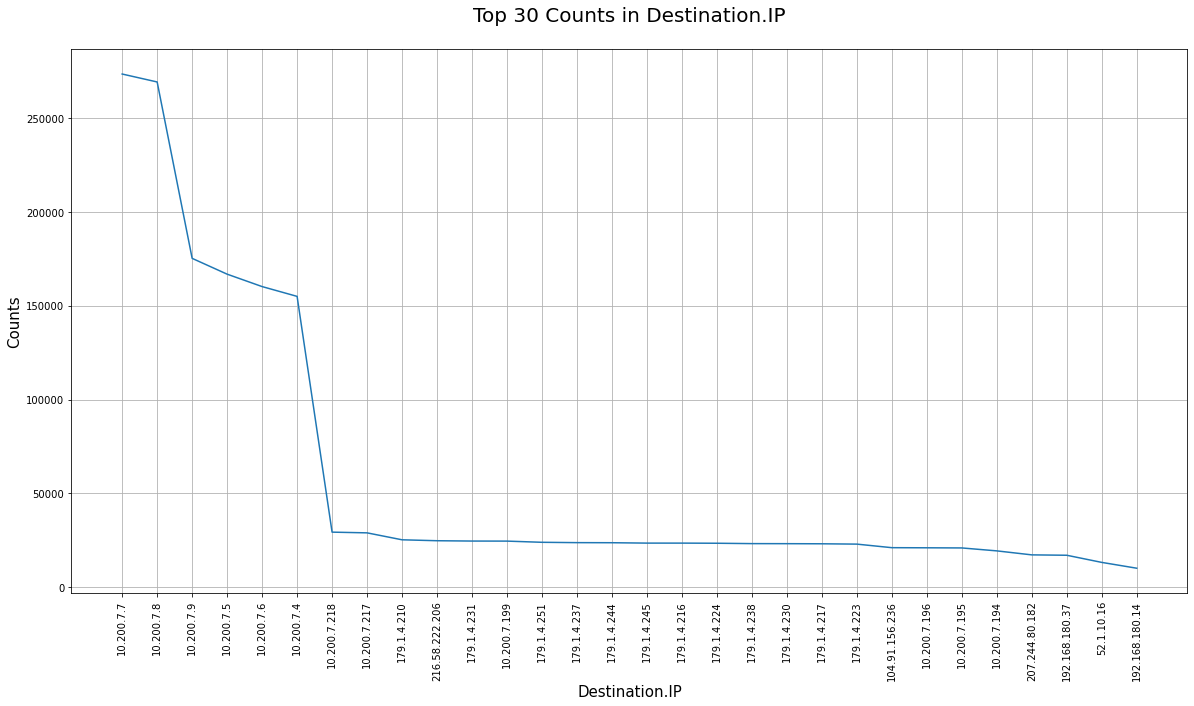

In [5]:
# Histogram on Destination.IP
Dest_feat = pd.DataFrame(dataset['Destination.IP'].value_counts()[:30])
plt.figure(figsize=(20,10))
plt.plot(Dest_feat)
plt.xticks(rotation=90)
plt.xlabel('Destination.IP', {'fontsize':15})
plt.ylabel('Counts', {'fontsize':15})
plt.title('Top 30 Counts in Destination.IP\n', {'fontsize':20})
plt.grid()
plt.savefig('hist Destination.IP.png')
Dest_feat = Dest_feat.reset_index()['index'].values

In [6]:
Dest_feat

array(['10.200.7.7', '10.200.7.8', '10.200.7.9', '10.200.7.5',
       '10.200.7.6', '10.200.7.4', '10.200.7.218', '10.200.7.217',
       '179.1.4.210', '216.58.222.206', '179.1.4.231', '10.200.7.199',
       '179.1.4.251', '179.1.4.237', '179.1.4.244', '179.1.4.245',
       '179.1.4.216', '179.1.4.224', '179.1.4.238', '179.1.4.230',
       '179.1.4.217', '179.1.4.223', '104.91.156.236', '10.200.7.196',
       '10.200.7.195', '10.200.7.194', '207.244.80.182', '192.168.180.37',
       '52.1.10.16', '192.168.180.14'], dtype=object)

In [7]:
Sour_feat

array(['10.200.7.218', '10.200.7.217', '10.200.7.199', '10.200.7.195',
       '10.200.7.194', '10.200.7.196', '10.200.7.9', '10.200.7.6',
       '10.200.7.4', '10.200.7.5', '10.200.7.7', '10.200.7.8',
       '192.168.180.37', '64.233.186.189', '64.233.190.189',
       '192.168.180.14', '162.125.18.133', '192.168.112.14',
       '192.168.90.65', '192.168.180.16', '10.230.1.12', '192.168.52.26',
       '192.168.10.19', '192.168.202.4', '192.168.72.43', '192.168.10.65',
       '192.168.72.88', '192.168.112.12', '192.168.10.4',
       '192.168.42.113'], dtype=object)

In [8]:
# Filtering the dataset to contain only 30 frequently reported IP address in Source.IP and Destination.IP
f_dataset = dataset[dataset['Destination.IP'].isin(Dest_feat) & dataset['Source.IP'].isin(Sour_feat)].reset_index()
f_dataset = f_dataset.drop('index', axis=1)

In [9]:
# making dummies
dum_s = pd.get_dummies(f_dataset['Source.IP'])

dum_d = pd.get_dummies(f_dataset['Destination.IP'])

label = pd.get_dummies(f_dataset['ProtocolName'])

In [10]:
dum_s.shape

(577622, 30)

In [11]:
dum_d.shape

(577622, 30)

In [12]:
label.shape

(577622, 32)

In [13]:
f_dataset.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [14]:
# removing columns
f_dataset = f_dataset.drop(f_dataset.select_dtypes(include = ['object']).columns, axis = 1)
f_dataset = f_dataset.drop(['Source.Port','Destination.Port','L7Protocol','Protocol'], axis = 1)
f_dataset.columns

Index(['Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count',
       'SYN.Flag.Count', 'RST.Flag.Count', 'PS

In [15]:
f_dataset.shape

(577622, 77)

In [16]:
p_dataset = pd.concat([f_dataset, dum_s, dum_d], axis=1)

In [17]:
# normalizing the data
scaler = MinMaxScaler()
n_dataset = scaler.fit_transform(p_dataset)

In [18]:
n_dataset.shape

(577622, 137)

In [19]:
# spliting the dataset
X = n_dataset
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.4, random_state = 101)

print(X_train.shape,'\n',y_train.shape,'\n',X_test.shape,'\n',y_test.shape,'\n')

(231048, 137) 
 (231048, 32) 
 (346574, 137) 
 (346574, 32) 



In [20]:
# defining the model
model = tf.keras.Sequential(
    layers=[tf.keras.layers.Dense(100, input_shape=[X.shape[1]]),
            tf.keras.layers.Dense(100, activation='tanh'),
            tf.keras.layers.Dense(100, activation='tanh'),
            tf.keras.layers.Dense(100, activation='tanh'),
            tf.keras.layers.Dense(y.shape[1], activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               13800     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                3232      
Total params: 47,332
Trainable params: 47,332
Non-trainable params: 0
_________________________________________________________________


In [21]:
# training the model
t2 = time.time()
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0)
t3 = time.time()

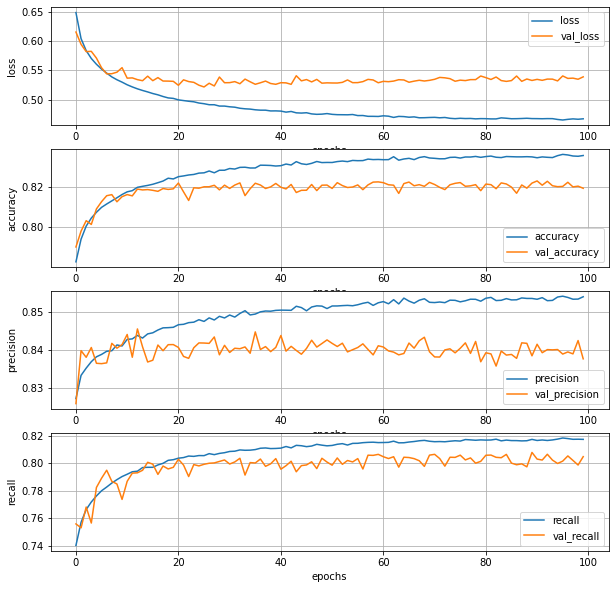

In [22]:
# training figures
plt.figure(figsize=(10,10))

plt.subplot(411)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.subplot(412)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.subplot(413)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.legend(['precision', 'val_precision'])
plt.xlabel('epochs')
plt.ylabel('precision')
plt.grid()

plt.subplot(414)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.legend(['recall', 'val_recall'])
plt.xlabel('epochs')
plt.ylabel('recall')
plt.grid()

plt.savefig('training.png')

In [23]:
# prediction
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print('loss:      {}\naccuracy:  {}\nprecision: {}\nrecall:    {}\n'.format(loss, accuracy, precision, recall))

loss:      0.5381858348846436
accuracy:  0.8199431896209717
precision: 0.8376033306121826
recall:    0.8044688701629639



In [24]:
# time taken
t4 = time.time()

print('run time            = {} sec'.format(int(t4 - t1)))
print('training time       = {} sec'.format(int(t3 - t2)))
print('pre-processing time = {} sec'.format(int(t2 - t1)))

run time            = 1354 sec
training time       = 1295 sec
pre-processing time = 44 sec


In [25]:
y_true = y_test.idxmax(
    axis='columns'
).reset_index().drop('index', axis=1).rename(columns={'0':'ProtocolName'})

In [26]:
y_pred = pd.DataFrame(pd.DataFrame(model.predict(X_test),
                                   columns = y_test.columns)
                      .idxmax(axis='columns'), columns=['ProtocolName'])

In [27]:
conf_mat = pd.DataFrame(confusion_matrix(y_true, y_pred,
                                         labels = label.columns),
                        columns = label.columns,
                        index = label.columns)

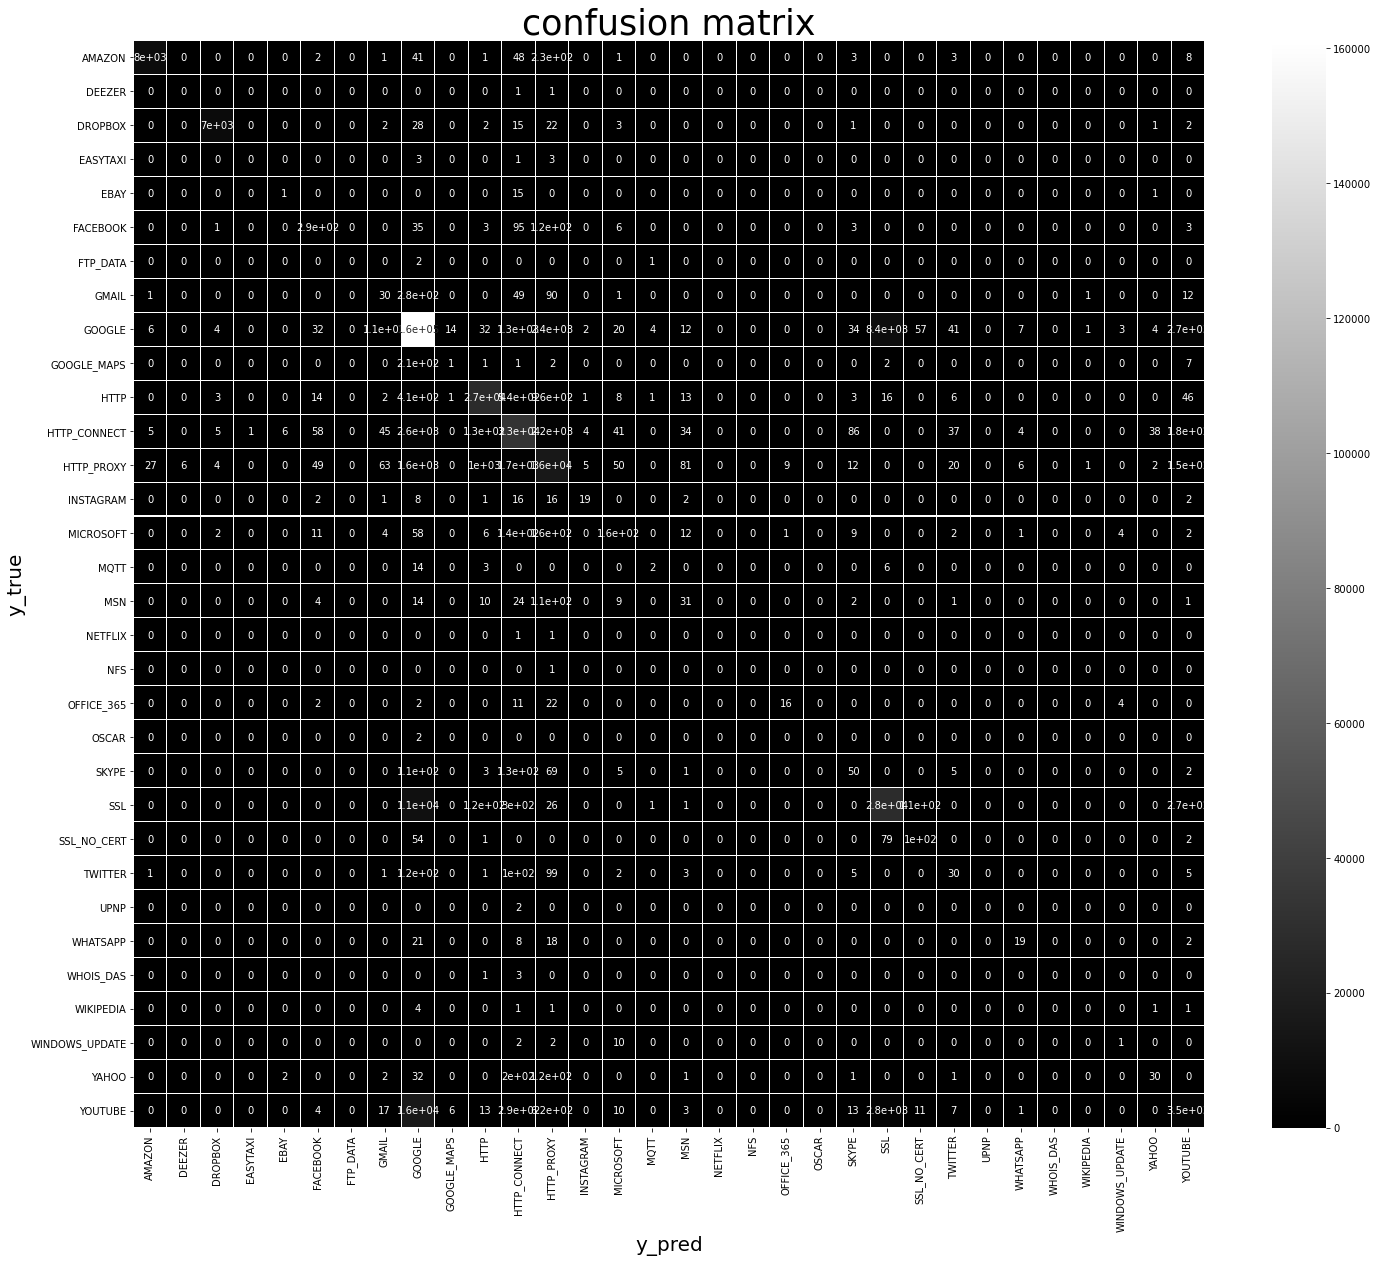

In [28]:
plt.figure(figsize=(24,20))

sns.heatmap(conf_mat,
            cmap = 'gray',
            linecolor = 'white',
            linewidths = 0.01,
            annot=True)

plt.title("confusion matrix", {'fontsize':35})
plt.xlabel('y_pred', {'fontsize':20})
plt.ylabel('y_true', {'fontsize':20})
plt.savefig('confusion matrix.png')

In [29]:
print(classification_report(y_true, y_pred))

C:\Users\Pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

        AMAZON       1.00      0.96      0.98      8375
        DEEZER       0.00      0.00      0.00         2
       DROPBOX       1.00      0.99      0.99      7057
      EASYTAXI       0.00      0.00      0.00         7
          EBAY       0.11      0.06      0.08        17
      FACEBOOK       0.62      0.52      0.56       552
      FTP_DATA       0.00      0.00      0.00         3
         GMAIL       0.11      0.07      0.08       459
        GOOGLE       0.83      0.91      0.87    176419
   GOOGLE_MAPS       0.05      0.00      0.01       221
          HTTP       0.95      0.93      0.94     29252
  HTTP_CONNECT       0.87      0.86      0.86     38199
    HTTP_PROXY       0.68      0.76      0.72     20443
     INSTAGRAM       0.61      0.28      0.39        67
     MICROSOFT       0.49      0.28      0.36       569
          MQTT       0.22      0.08      0.12        25
           MSN       0.16      0.15      0.16  

C:\Users\Pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
